In [81]:
#Importing the datset we have New dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filenames = [
    "../data/pct_data_2018.csv",
    "../data/pct_data_2019.csv",
    "../data/pct_data_2020.csv",
    "../data/pct_data_2021.csv",
    "../data/pct_data_2022.csv",
    "../data/pct_data_2023.csv",
    "../data/pct_data_2024.csv"
]

# Read each file into a DF and store them in a list
dataframes = [pd.read_csv (f, sep=';') for f in filenames]

# Concatenate all dfs into a single df
raw_data= pd.concat(dataframes, ignore_index=True)
raw_dataset = raw_data

In [82]:
raw_dataset.shape

(109897, 33)

Eliminate I category

In [83]:
# Define a function that categorizes sepsis based on PCT values
def categorize_sepsis(pct_value):
    if pct_value > 2:
        return 'P'  # Yes, sepsis likely
    elif pct_value >= 0.1:
        return 'I'  # Maybe, intermediate or gray area
    else:
        return 'N'  # No, sepsis unlikely

# Apply this function to the 'PCT' column to create a new categorical column
raw_dataset['sepsis_cat'] = raw_dataset['PCT'].apply(categorize_sepsis)

# Insert the 'sepsis_cat' column before the 'PCT' column
pct_index = raw_dataset.columns.get_loc('PCT')  # Find the index of 'PCT' column
raw_dataset.insert(pct_index, 'sepsis_cat', raw_dataset.pop('sepsis_cat'))
raw_dataset.shape

(109897, 34)

In [84]:
# Data subsets for different sepsis categories
pct_data_sepsis_yes = raw_dataset[raw_dataset['sepsis_cat'] == 'P']
pct_data_sepsis_no = raw_dataset[raw_dataset['sepsis_cat'] == 'N']
pct_data_sepsis_I = raw_dataset[raw_dataset['sepsis_cat'] == 'I']
combined_data = pd.concat([pct_data_sepsis_yes, pct_data_sepsis_no], axis=0)
print(combined_data.shape)
print(pct_data_sepsis_I.shape)

(69923, 34)
(39974, 34)


In [85]:
raw_dataset = combined_data
raw_dataset.shape

(69923, 34)

Correction of sex labels

In [86]:
# Filter the DataFrame to keep only rows where 'sex' is either 'M' or 'W'
raw_dataset = raw_dataset[raw_dataset['sex'].isin(['m', 'f'])]
pct_data_sepsis_I = pct_data_sepsis_I[pct_data_sepsis_I['sex'].isin(['m', 'f'])]
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 34)
(39010, 34)


In [87]:
# Transform sex column: 'f' to 'W' and 'm' to 'M'
raw_dataset['sex'] = raw_dataset['sex'].replace({'f': 'W', 'm': 'M'})
pct_data_sepsis_I['sex'] = pct_data_sepsis_I['sex'].replace({'f': 'W', 'm': 'M'})
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 34)
(39010, 34)


C:\Users\menia\AppData\Local\Temp\ipykernel_29072\1315486616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset['sex'] = raw_dataset['sex'].replace({'f': 'W', 'm': 'M'})


In [88]:
columns_to_drop = ['%h-ERY', 'NOR-Ge', 'XNRBC', 'Unnamed: 0']
raw_dataset.drop(columns=columns_to_drop, axis=1, inplace=True)
pct_data_sepsis_I.drop(columns=columns_to_drop, axis=1, inplace=True)
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 30)
(39010, 30)


C:\Users\menia\AppData\Local\Temp\ipykernel_29072\1842070725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset.drop(columns=columns_to_drop, axis=1, inplace=True)


In [89]:
current_year = 2024
raw_dataset['age'] = current_year - raw_dataset['year_of_birth']
# Drop the 'year_of_birth' column without reassigning clean_data
raw_dataset.drop('year_of_birth', axis=1, inplace=True)

pct_data_sepsis_I['age'] = current_year - pct_data_sepsis_I['year_of_birth']
# Drop the 'year_of_birth' column without reassigning clean_data
pct_data_sepsis_I.drop('year_of_birth', axis=1, inplace=True)

print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 30)
(39010, 30)


C:\Users\menia\AppData\Local\Temp\ipykernel_29072\1461858049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset['age'] = current_year - raw_dataset['year_of_birth']
C:\Users\menia\AppData\Local\Temp\ipykernel_29072\1461858049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset.drop('year_of_birth', axis=1, inplace=True)


In [90]:
count_null_or_negative = (raw_dataset['age'].isna() | (raw_dataset['age'] <= 0)).sum()
count_null_or_negativeI = (pct_data_sepsis_I['age'].isna() | (pct_data_sepsis_I['age'] <= 0)).sum()

print("Count of null or negative values in 'age' column:", count_null_or_negative)
print("Count of null or negative values in 'age' column:", count_null_or_negativeI)

Count of null or negative values in 'age' column: 2
Count of null or negative values in 'age' column: 1


In [91]:
filtered_df = raw_dataset

In [92]:
# Remove rows where the 'age' column has null values
filtered_df = filtered_df.dropna(subset=['age'])
pct_data_sepsis_I = pct_data_sepsis_I.dropna(subset=['age'])

In [93]:
# Calculate the count of null values in each column
null_counts = filtered_df.isnull().sum()
null_countsI = pct_data_sepsis_I.isnull().sum()

# Print the count of null values for each column
print(null_counts)
print(null_countsI)


order_number    0
sex             0
sepsis_cat      0
PCT             0
IL6             0
HK              0
LYMABS          0
THROMB          0
MONOZY          0
HB              0
GRANAB          0
MPV             0
RDW-SD          0
MicroE          0
MCHC            0
LYMPHO          0
IG%             0
IG#             0
ERY             0
EOSABS          0
MakroE          0
MCH             0
GRANUL          0
EOSINO          0
LEUKO           0
BASOAB          0
MCV             0
MONABS          0
BASOPH          0
age             0
dtype: int64
order_number    0
sex             0
sepsis_cat      0
PCT             0
IL6             0
HK              0
LYMABS          0
THROMB          0
MONOZY          0
HB              0
GRANAB          0
MPV             0
RDW-SD          0
MicroE          0
MCHC            0
LYMPHO          0
IG%             0
IG#             0
ERY             0
EOSABS          0
MakroE          0
MCH             0
GRANUL          0
EOSINO          0
LEUKO          

In [94]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(68725, 30)
(39009, 30)


In [95]:
#Counting minus 1 on all columns:
counts_minus_one = (filtered_df == -1).sum()

# Display the count for each column
print(counts_minus_one)

#Counting minus 1 on all columns:
counts_minus_oneI = (pct_data_sepsis_I == -1).sum()

# Display the count for each column
print(counts_minus_oneI)

order_number        0
sex                 0
sepsis_cat          0
PCT              1645
IL6             52524
HK               1712
LYMABS          19363
THROMB           1722
MONOZY          19379
HB               1712
GRANAB          19370
MPV             29770
RDW-SD          29187
MicroE           2256
MCHC             1713
LYMPHO          19364
IG%             18411
IG#             47663
ERY              1712
EOSABS          24072
MakroE           2246
MCH              1712
GRANUL          19370
EOSINO          24277
LEUKO            1735
BASOAB          20301
MCV              1712
MONABS          19380
BASOPH          20337
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
IL6             22946
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              9

In [96]:
# Calculate the percentage of '-1' values for each column
percentage_minus_one = (counts_minus_one / filtered_df.shape[0]) * 100
percentage_minus_oneI = (counts_minus_oneI / pct_data_sepsis_I.shape[0]) * 100

# Display the percentage for each column
print(percentage_minus_one)
print(percentage_minus_oneI)


order_number     0.000000
sex              0.000000
sepsis_cat       0.000000
PCT              2.393598
IL6             76.426337
HK               2.491088
LYMABS          28.174609
THROMB           2.505638
MONOZY          28.197890
HB               2.491088
GRANAB          28.184794
MPV             43.317570
RDW-SD          42.469262
MicroE           3.282648
MCHC             2.492543
LYMPHO          28.176064
IG%             26.789378
IG#             69.353219
ERY              2.491088
EOSABS          35.026555
MakroE           3.268097
MCH              2.491088
GRANUL          28.184794
EOSINO          35.324845
LEUKO            2.524554
BASOAB          29.539469
MCV              2.491088
MONABS          28.199345
BASOPH          29.591852
age              0.000000
dtype: float64
order_number     0.000000
sex              0.000000
sepsis_cat       0.000000
PCT              0.000000
IL6             58.822323
HK               2.419954
LYMABS          42.585044
THROMB           2.4276

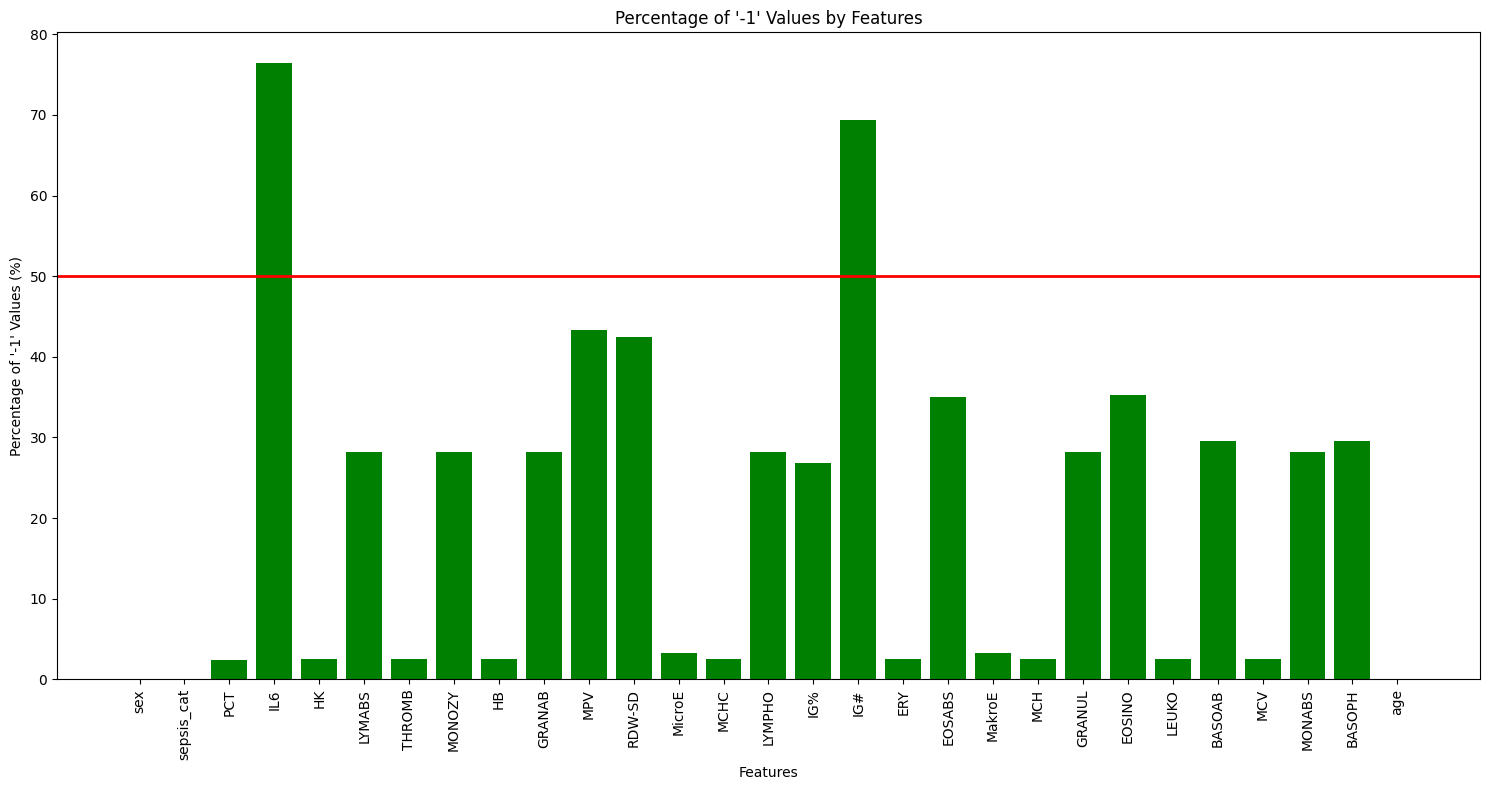

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# New dataset with updated values
percentage_minus_one = pd.Series({
    'sex': 0.000000,
    'sepsis_cat': 0.000000,
    'PCT': 2.393598,
    'IL6': 76.426337,
    'HK': 2.491088,
    'LYMABS': 28.174609,
    'THROMB': 2.505638,
    'MONOZY': 28.197890,
    'HB': 2.491088,
    'GRANAB': 28.184794,
    'MPV': 43.317570,
    'RDW-SD': 42.469262,
    'MicroE': 3.282648,
    'MCHC': 2.492543,
    'LYMPHO': 28.176064,
    'IG%': 26.789378,
    'IG#': 69.353219,
    'ERY': 2.491088,
    'EOSABS': 35.026555,
    'MakroE': 3.268097,
    'MCH': 2.491088,
    'GRANUL': 28.184794,
    'EOSINO': 35.324845,
    'LEUKO': 2.524554,
    'BASOAB': 29.539469,
    'MCV': 2.491088,
    'MONABS': 28.199345,
    'BASOPH': 29.591852,
    'age': 0.000000
})


# Create a bar chart
plt.figure(figsize=(15, 8))  # Adjusted the figure size for better visibility
plt.bar(percentage_minus_one.index, percentage_minus_one.values, color='green')
plt.xlabel('Features')
plt.ylabel('Percentage of \'-1\' Values (%)')
plt.title('Percentage of \'-1\' Values by Features')
# Add a horizontal line at 60%
plt.axhline(y=50, color='r', linestyle='-', linewidth=2)  # red line, solid, width of 2
plt.xticks(rotation=90)  # Rotates the test parameter names for better visibility
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


In [98]:
columns_to_drop =['IG#', 'IL6']
filtered_df.drop(columns=columns_to_drop, axis=1, inplace=True)
pct_data_sepsis_I.drop(columns=columns_to_drop, axis=1, inplace=True)

C:\Users\menia\AppData\Local\Temp\ipykernel_29072\186374524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [99]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(68725, 28)
(39009, 28)


In [100]:
#Filter out rows where PCT == -1
filtered_df = filtered_df[filtered_df['PCT'] != -1]
pct_data_sepsis_I = pct_data_sepsis_I[pct_data_sepsis_I['PCT'] != -1]

In [101]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(67080, 28)
(39009, 28)


In [102]:
#Counting minus 1 on all columns:
counts_minus_one = (filtered_df == -1).sum()

# Display the count for each column
print(counts_minus_one)

#Counting minus 1 on all columns:
counts_minus_oneI = (pct_data_sepsis_I == -1).sum()

# Display the count for each column
print(counts_minus_oneI)

order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK               1110
LYMABS          18457
THROMB           1119
MONOZY          18472
HB               1110
GRANAB          18464
MPV             28558
RDW-SD          27989
MicroE           1639
MCHC             1110
LYMPHO          18458
IG%             17534
ERY              1110
EOSABS          23084
MakroE           1629
MCH              1110
GRANUL          18464
EOSINO          23283
LEUKO            1132
BASOAB          19373
MCV              1110
MONABS          18473
BASOPH          19408
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              944
LYMPHO          16612
IG%             15827
ERY               9

In [103]:
# Replace -1 values with NaN
filtered_df.replace(-1, pd.NA, inplace=True)
pct_data_sepsis_I.replace(-1, pd.NA, inplace=True)

# Counting minus 1 on all columns (this will now count NaN instead of -1)
counts_minus_one = filtered_df.isna().sum()
counts_minus_oneI = pct_data_sepsis_I.isna().sum()

# Display the count for each column
print(counts_minus_one)
print(counts_minus_oneI)


order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK               1110
LYMABS          18457
THROMB           1119
MONOZY          18472
HB               1110
GRANAB          18464
MPV             28558
RDW-SD          27989
MicroE           1639
MCHC             1110
LYMPHO          18458
IG%             17534
ERY              1110
EOSABS          23084
MakroE           1629
MCH              1110
GRANUL          18464
EOSINO          23283
LEUKO            1132
BASOAB          19373
MCV              1110
MONABS          18473
BASOPH          19408
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              944
LYMPHO          16612
IG%             15827
ERY               9

In [104]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(67080, 28)
(39009, 28)


In [105]:
print(filtered_df.columns)
print(pct_data_sepsis_I.columns)

Index(['order_number', 'sex', 'sepsis_cat', 'PCT', 'HK', 'LYMABS', 'THROMB',
       'MONOZY', 'HB', 'GRANAB', 'MPV', 'RDW-SD', 'MicroE', 'MCHC', 'LYMPHO',
       'IG%', 'ERY', 'EOSABS', 'MakroE', 'MCH', 'GRANUL', 'EOSINO', 'LEUKO',
       'BASOAB', 'MCV', 'MONABS', 'BASOPH', 'age'],
      dtype='object')
Index(['order_number', 'sex', 'sepsis_cat', 'PCT', 'HK', 'LYMABS', 'THROMB',
       'MONOZY', 'HB', 'GRANAB', 'MPV', 'RDW-SD', 'MicroE', 'MCHC', 'LYMPHO',
       'IG%', 'ERY', 'EOSABS', 'MakroE', 'MCH', 'GRANUL', 'EOSINO', 'LEUKO',
       'BASOAB', 'MCV', 'MONABS', 'BASOPH', 'age'],
      dtype='object')


In [106]:
#first dataset

In [107]:
# Select specific columns
selected_columns = [
    'age', 'sex', 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'PCT']

# Creating a new DataFrame with only the selected columns
first_df = filtered_df[selected_columns]

# Display the new DataFrame
print(first_df.head())

     age sex    HB    MCV THROMB   ERY LEUKO    PCT
6   60.0   M  10.0   93.4     48  3.18  10.8   2.34
12  90.0   M  11.6   90.2    104  3.68   6.6   6.54
13  80.0   M  11.2   93.5    434  3.72  14.5   5.22
15  55.0   M  11.5  101.8    144  3.37   6.5   3.33
25  68.0   W   9.2   89.9    303  3.06  11.3  36.60


In [108]:
#KNN
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Convert pd.NA to np.nan
first_df = first_df.replace({pd.NA: np.nan})

# One-hot encode the 'sex' column
# One-hot encode the 'sex' column and drop the first category
first_df = pd.get_dummies(first_df, columns=['sex'], drop_first=True)
# Step 3: Setup the Iterative Imputer with a KNN estimator
# You can adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Step 4: Fit and transform the data
# This will fill in all missing values in the dataframe
first_df_imputed = pd.DataFrame(imputer.fit_transform(first_df), columns=first_df.columns)

C:\Users\menia\AppData\Local\Temp\ipykernel_29072\3520176608.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  first_df = first_df.replace({pd.NA: np.nan})
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


auc_scores [0.9126909462963955, 0.917693949147534, 0.917989420940565, 0.9157244126343845, 0.9198356083607838]
Mean auc_scores: 0.9167868674759326
accuracy_scores [0.810077519379845, 0.8571109123434705, 0.865757304710793, 0.864788312462731, 0.8559928443649374]
Mean accuracy_scores: 0.8507453786523553
precision_scores [0.4515033947623666, 0.5347786811201445, 0.5559858018715714, 0.5544328552803129, 0.5318208603417797]
Mean precision_scores: 0.525704318675235
recall_scores [0.866852886405959, 0.8268156424581006, 0.8021415270018621, 0.7918994413407822, 0.840316573556797]
Mean recall_scores: 0.8256052141527002
f1_scores [0.59375, 0.6494788809654416, 0.656756241661902, 0.6522239263803681, 0.651389390111873]
Mean f1_scores: 0.640719687823917
confusion_matrices [[48201  8139]
 [ 1873  8867]]


c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

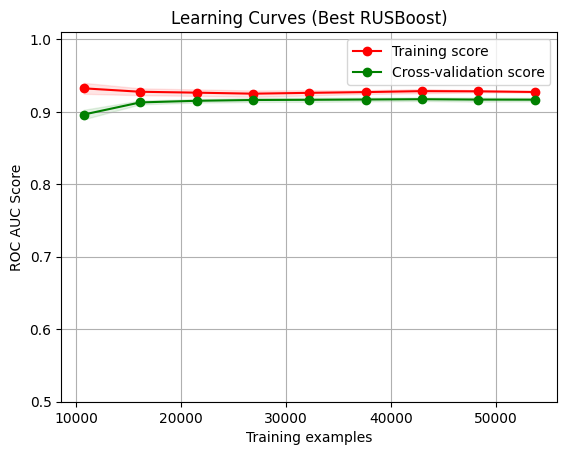

In [109]:
#Best model
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume data is already loaded and preprocessed
data = first_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Instantiate the best model from grid search
best_model = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=300,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=1714400672
)

# Perform detailed evaluation on the best model
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print(f"Mean {metric}: {np.mean(values)}")

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [110]:
#second dataset with detailed white blood cells 

In [111]:
# Select specific columns
selected_columns = [
    'age', 'sex' , 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'PCT', 'LYMABS', 'MONOZY', 'GRANAB', 'LYMPHO', 'IG%', 'EOSABS', 'GRANUL', 'EOSINO', 'BASOAB', 'MONABS', 'BASOPH']

# Creating a new DataFrame with only the selected columns
second_df = filtered_df[selected_columns]

# Display the new DataFrame
print(second_df.head())

     age sex    HB    MCV THROMB   ERY LEUKO    PCT LYMABS MONOZY GRANAB  \
6   60.0   M  10.0   93.4     48  3.18  10.8   2.34   <NA>   <NA>   <NA>   
12  90.0   M  11.6   90.2    104  3.68   6.6   6.54   0.41    2.4   6.07   
13  80.0   M  11.2   93.5    434  3.72  14.5   5.22   <NA>   <NA>   <NA>   
15  55.0   M  11.5  101.8    144  3.37   6.5   3.33   0.37    6.0   5.71   
25  68.0   W   9.2   89.9    303  3.06  11.3  36.60    0.8   10.4   9.22   

   LYMPHO   IG% EOSABS GRANUL EOSINO BASOAB MONABS BASOPH  
6    <NA>  <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
12    6.2   0.5   <NA>   91.2   <NA>   0.01   0.16    0.2  
13   <NA>  <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
15    5.7   0.6   0.01   87.3    0.2   0.05   0.39    0.8  
25    7.1   2.1   0.07   81.4    0.6   0.06   1.18    0.5  


In [112]:
print(second_df.columns)  # This will show you the current column names in the DataFrame

Index(['age', 'sex', 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'PCT', 'LYMABS',
       'MONOZY', 'GRANAB', 'LYMPHO', 'IG%', 'EOSABS', 'GRANUL', 'EOSINO',
       'BASOAB', 'MONABS', 'BASOPH'],
      dtype='object')


In [113]:
#KNN
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Convert pd.NA to np.nan
second_df = second_df.replace({pd.NA: np.nan})

# One-hot encode the 'sex' column
# One-hot encode the 'sex' column and drop the first category
second_df = pd.get_dummies(second_df, columns=['sex'], drop_first=True)
#Step 3: Setup the Iterative Imputer with a KNN estimator
# You can adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Step 4: Fit and transform the data
# This will fill in all missing values in the dataframe
second_df_imputed = pd.DataFrame(imputer.fit_transform(second_df), columns=second_df.columns)

C:\Users\menia\AppData\Local\Temp\ipykernel_29072\3379972582.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  second_df = second_df.replace({pd.NA: np.nan})


c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


auc_scores [0.9265183568900973, 0.9364565629402227, 0.9359356087574179, 0.9358885910827387, 0.937162695697643]
Mean auc_scores: 0.9343923630736238
accuracy_scores [0.8352713178294574, 0.8723166368515206, 0.8820810971973763, 0.8854353011329755, 0.8770870602265951]
Mean accuracy_scores: 0.870438282647585
precision_scores [0.4918292040063258, 0.567651632970451, 0.5937707090788602, 0.6061132337617228, 0.5782376920664786]
Mean precision_scores: 0.5675204943767677
recall_scores [0.8687150837988827, 0.8496275605214153, 0.8342644320297952, 0.8123836126629422, 0.8584729981378026]
Mean recall_scores: 0.8446927374301676
f1_scores [0.6280713564456412, 0.6805892224501212, 0.6937669376693767, 0.6942510443604536, 0.6910249203672475]
Mean f1_scores: 0.6775406962585679
confusion_matrices [[49317  7023]
 [ 1668  9072]]


c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

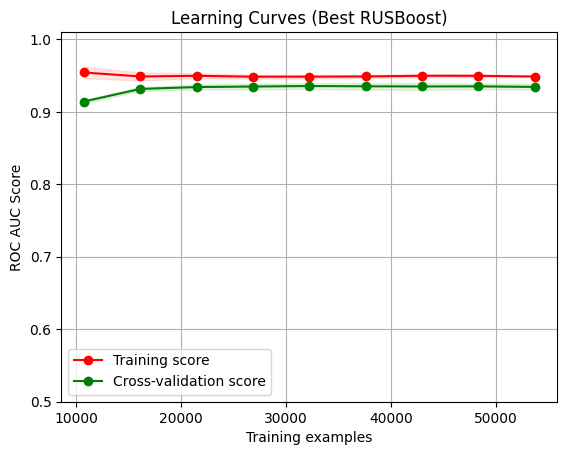

In [114]:
#Best model
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume data is already loaded and preprocessed
data = second_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Instantiate the best model from grid search
best_model = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=300,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=1714400672
)

# Perform detailed evaluation on the best model
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print(f"Mean {metric}: {np.mean(values)}")

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [115]:
# our important features

In [116]:
# Select specific columns
selected_columns = [
    'HK', 'THROMB', 'HB', 'ERY', 'BASOPH', 'LEUKO', 'EOSINO', 'RDW-SD', 'LYMABS', 'PCT']
# Creating a new DataFrame with only the selected columns
final_df4 = filtered_df[selected_columns]

# Display the new DataFrame
print(final_df4.head())

      HK THROMB    HB   ERY BASOPH LEUKO EOSINO RDW-SD LYMABS    PCT
6   29.7     48  10.0  3.18   <NA>  10.8   <NA>   <NA>   <NA>   2.34
12  33.2    104  11.6  3.68    0.2   6.6   <NA>   <NA>   0.41   6.54
13  34.8    434  11.2  3.72   <NA>  14.5   <NA>   <NA>   <NA>   5.22
15  34.3    144  11.5  3.37    0.8   6.5    0.2   <NA>   0.37   3.33
25  27.5    303   9.2  3.06    0.5  11.3    0.6   <NA>    0.8  36.60


In [117]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming final_df4 is your initial DataFrame and it contains pd.NA values
final_df4 = final_df4.replace({pd.NA: np.nan})  # Correctly reference final_df4 here

# One-hot encode the 'sex' column
#final_df4 = pd.get_dummies(final_df4, columns=['sex'], drop_first=True)

# Setup the Iterative Imputer with a KNN estimator
# Adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Fit and transform the data to fill in all missing values
final_df4_imputed = pd.DataFrame(imputer.fit_transform(final_df4), columns=final_df4.columns)


C:\Users\menia\AppData\Local\Temp\ipykernel_29072\175797584.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df4 = final_df4.replace({pd.NA: np.nan})  # Correctly reference final_df4 here
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


auc_scores [0.9281301789679447, 0.9366564087156389, 0.9382207173261041, 0.928524251534809, 0.9391399169976911]
Mean auc_scores: 0.9341342947084375
accuracy_scores [0.8240906380441264, 0.8691860465116279, 0.8822301729278473, 0.881633870005963, 0.8714967203339297]
Mean accuracy_scores: 0.8657274895646989
precision_scores [0.47357926221335994, 0.5588499550763701, 0.5932982917214192, 0.5956937799043063, 0.56404833836858]
Mean precision_scores: 0.557093925456807
recall_scores [0.8845437616387337, 0.8687150837988827, 0.840782122905028, 0.8114525139664804, 0.8691806331471136]
Mean recall_scores: 0.8549348230912477
f1_scores [0.6168831168831169, 0.6801530891197376, 0.6956856702619415, 0.6870319274733938, 0.6841333821912788]
Mean f1_scores: 0.6727774371858938
confusion_matrices [[48891  7449]
 [ 1558  9182]]


c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

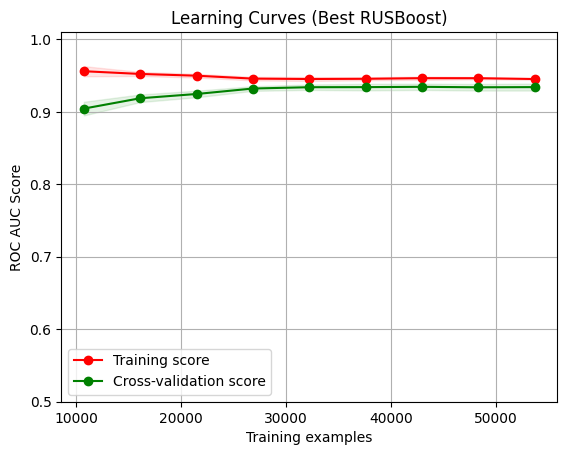

In [118]:
#Best model
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume data is already loaded and preprocessed
data = final_df4_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Instantiate the best model from grid search
best_model = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=300,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=1714400672
)

# Perform detailed evaluation on the best model
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print(f"Mean {metric}: {np.mean(values)}")

# Plot learning curves for the best model

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [119]:
print(y.value_counts())

Label
0    56340
1    10740
Name: count, dtype: int64


In [120]:
#combien first def and important features

In [121]:
# Select specific columns
selected_columns = [
    'age', 'sex', 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'PCT', 'HK', 'BASOPH', 'EOSINO', 'RDW-SD', 'LYMABS']

# Creating a new DataFrame with only the selected columns
combined_df = filtered_df[selected_columns]

# Display the new DataFrame
print(combined_df.head())

     age sex    HB    MCV THROMB   ERY LEUKO    PCT    HK BASOPH EOSINO  \
6   60.0   M  10.0   93.4     48  3.18  10.8   2.34  29.7   <NA>   <NA>   
12  90.0   M  11.6   90.2    104  3.68   6.6   6.54  33.2    0.2   <NA>   
13  80.0   M  11.2   93.5    434  3.72  14.5   5.22  34.8   <NA>   <NA>   
15  55.0   M  11.5  101.8    144  3.37   6.5   3.33  34.3    0.8    0.2   
25  68.0   W   9.2   89.9    303  3.06  11.3  36.60  27.5    0.5    0.6   

   RDW-SD LYMABS  
6    <NA>   <NA>  
12   <NA>   0.41  
13   <NA>   <NA>  
15   <NA>   0.37  
25   <NA>    0.8  


In [122]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming final_df4 is your initial DataFrame and it contains pd.NA values
combined_df = combined_df.replace({pd.NA: np.nan})  # Correctly reference final_df4 here

# One-hot encode the 'sex' column
combined_df = pd.get_dummies(combined_df, columns=['sex'], drop_first=True)

# Setup the Iterative Imputer with a KNN estimator
# Adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Fit and transform the data to fill in all missing values
combined_df_imputed = pd.DataFrame(imputer.fit_transform(combined_df), columns=combined_df.columns)


C:\Users\menia\AppData\Local\Temp\ipykernel_29072\617911814.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df = combined_df.replace({pd.NA: np.nan})  # Correctly reference final_df4 here
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


auc_scores [0.9223260577406792, 0.9342519380536766, 0.9314380665671115, 0.930593111852817, 0.935035910265487]
Mean auc_scores: 0.9307290168959543
accuracy_scores [0.8181276088252832, 0.8688133571854502, 0.8812611806797853, 0.8838700059630292, 0.874180083482409]
Mean accuracy_scores: 0.8652504472271915
precision_scores [0.4638613861386139, 0.5594362745098039, 0.5935288169868554, 0.6009582477754962, 0.5708128078817734]
Mean precision_scores: 0.5577195066585086
recall_scores [0.87243947858473, 0.8500931098696461, 0.8198324022346368, 0.8175046554934823, 0.8631284916201117]
Mean recall_scores: 0.8445996275605212
f1_scores [0.6056884292178409, 0.6747967479674797, 0.6885630498533725, 0.6927021696252466, 0.687175685693106]
Mean f1_scores: 0.6697852164714091
confusion_matrices [[48970  7370]
 [ 1669  9071]]


c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

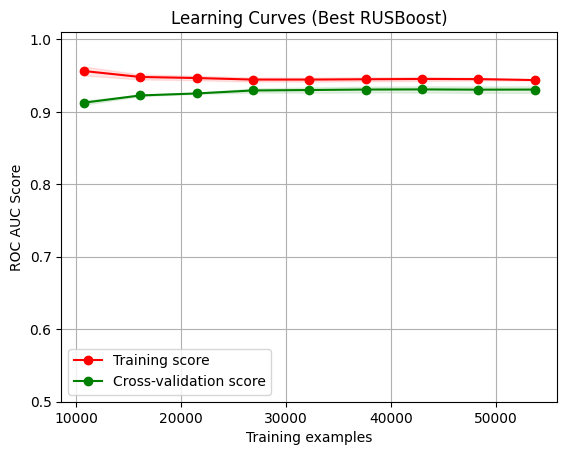

In [123]:
#Best model
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume data is already loaded and preprocessed
data = combined_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Instantiate the best model from grid search
best_model = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=300,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=1714400672
)

# Perform detailed evaluation on the best model
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print(f"Mean {metric}: {np.mean(values)}")

# Plot learning curves for the best model

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()